# Conclusion for my models regarding all the behavioural datasets

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1_mod = pd.read_csv('df1_models.csv')
df2_mod = pd.read_csv('df2_models.csv')
df3_mod = pd.read_csv('df3_models.csv')

#'Baseline', 'Decision tree', 'Random forest', 'kNN', 'SVC'

In [3]:
models = pd.concat([df1_mod, df2_mod, df3_mod], axis=1)

models.columns = ['SRS_BRIEF dataset', 'SRS_RBSR dataset', 'SRS dataset']
models.index = ['Baseline', 'Decision tree', 'Random forest', 'kNN', 'SVC']

models

,SRS_BRIEF dataset,SRS_RBSR dataset,SRS dataset
Baseline,52.808989,54.166667,50.000000
Decision tree,94.382022,97.222222,97.260274
Random forest,95.505618,98.611111,97.260274
kNN,96.629213,97.222222,97.260274
SVC,95.505618,95.833333,95.890411


# Plotting the behavioural models

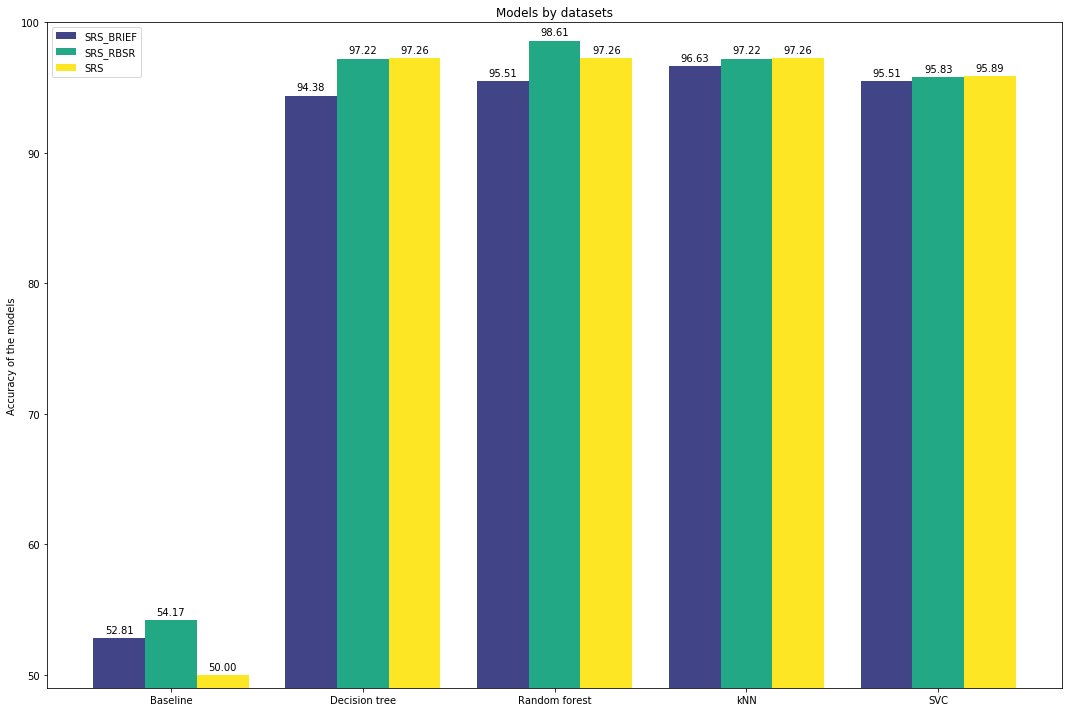

In [4]:
# I am gonne plot all my models
from matplotlib.pyplot import cm

color=cm.viridis(np.linspace(0.2,1, 3))

x = np.arange(5)
width = 0.27

models_list = ['Baseline', 'Decision tree', 'Random forest', 'kNN', 'SVC']

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x - width, models['SRS_BRIEF dataset'], width, label='SRS_BRIEF', color=color[0])
rects2 = ax.bar(x, models['SRS_RBSR dataset'], width, label='SRS_RBSR', color=color[1])
rects3 = ax.bar(x + width, models['SRS dataset'], width, label='SRS', color=color[2])

ax.set_ylabel('Accuracy of the models')
ax.set_title('Models by datasets')
ax.set_xticks(x)
ax.set_xticklabels(models_list)
ax.set_ylim(49,100)
ax.legend()

# Code from matplotlib example of barchar annotation
def labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


labels(rects1)
labels(rects2)
labels(rects3)

fig.tight_layout()
plt.show()

# Plotting the fMRI models

In [5]:
fmri_df = pd.read_csv('fMRI_models.csv')
fmri_df.index = ['Baseline', 'Linear SVC', 'SVC', 'Linear SVC confounds', 'SVC confounds']

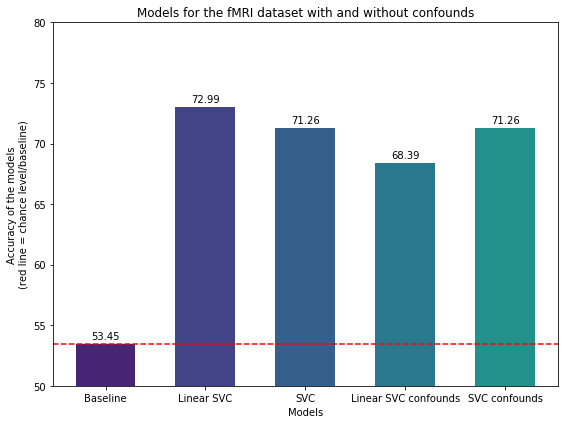

In [6]:
# I am gonne plot all my models
from matplotlib.pyplot import cm

color=cm.viridis(np.linspace(0.1,0.5, 5))

x = np.arange(5)
width = 0.6

models_list = ['Baseline', 'Linear SVC', 'SVC', 'Linear SVC confounds', 'SVC confounds']

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x, fmri_df['Models'], width, color=color)

ax.set_ylabel('Accuracy of the models\n(red line = chance level/baseline)')
ax.set_xlabel('Models')
ax.set_title('Models for the fMRI dataset with and without confounds')
ax.set_xticks(x)
ax.set_xticklabels(models_list)
ax.set_ylim(50,80)

# Code from matplotlib example of barchar annotation
def labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


labels(rects1)

fig.tight_layout()
plt.gca().axhline(53.448276, color='red', linestyle='--')
plt.show()

# Conclusion 


## For the behavioural data:
The SRS_RBSR and SRS are the best datasets. In those two the Decision tree, random forest and kNN models score around the same accuracy.

Two things : 
* The Random forest with the SRS RBSR is the best with 98.61% but in the smaller dataset
* The models of the SRS datasets score all at the same accuracy and with a dataset double the size as the SRS_RBSR.

Even if the random forest of the SRS_RBSR is better by a little, in term of predicting clinical outcomes I would go with the models of the last dataset. As the dataset is bigger the results can be more trusted, the increase in the train and test data allows us to have a better fiability with the predictions.

## For the fMRI data:
It seems that behavioural data are way better to detect and classify autism (which make sense considering the tests used were develop in that approach). <br>

The smallest change in parameter (especially the random seed) makes the results change drastically. Despite the fact that these models correctly classify autism with 72 percent of accuracy, I believe that these results are not very reliable. I think that the complexity of the data makes it hard for the model to classify with accuracy and to find a good balance between underfitting and overfitting is really hard. <br>
The confusion matrix of our best model (72.99%) shows that autism is a little more difficult to classify than control. If we watch the confusion matrix of the other models we can clearly see that they classify more easily the control patients. 